## Androgen receptor
In this notebook we predict if a molecule is active for androgen receptor. Here I use the QSAR methodology for prediction of the activity.

In [1]:
from rdkit import Chem
import pandas as pd
from rdkit.Chem.Draw import IPythonConsole
from IPython.core.display import display
import numpy as np

In [2]:
!cat tox21/TOX21_README

The “Toxicology in the 21st Century” (Tox21) initiative created a public database measuring toxicity of compounds, which has been used in the 2014 Tox21 Data Challenge. This dataset contains qualitative toxicity measurements for 8k compounds on 12 different targets, including nuclear receptors and stress response pathways.

The data file contains a csv table, in which columns below are used:
     "smiles" - SMILES representation of the molecular structure
     "NR-XXX" - Nuclear receptor signaling bioassays results
     "SR-XXX" - Stress response bioassays results
	please refer to the links at https://tripod.nih.gov/tox21/challenge/data.jsp for details.

References:
Tox21 Challenge. https://tripod.nih.gov/tox21/challenge/


In [3]:
df = pd.read_csv('tox21/tox21.csv')

In [6]:
list(df.columns)

['NR-AR',
 'NR-AR-LBD',
 'NR-AhR',
 'NR-Aromatase',
 'NR-ER',
 'NR-ER-LBD',
 'NR-PPAR-gamma',
 'SR-ARE',
 'SR-ATAD5',
 'SR-HSE',
 'SR-MMP',
 'SR-p53',
 'mol_id',
 'smiles']

In [7]:
df = df[['NR-AR','smiles']]

In [8]:
from rdkit.Chem import PandasTools

In [73]:
PandasTools.AddMoleculeColumnToFrame(df,smilesCol='smiles', includeFingerprints=True)

RDKit WARNING: [15:11:11] WARNING: not removing hydrogen atom without neighbors


In [74]:
df = df[~df['ROMol'].isnull()]
df = df[~df['NR-AR'].isnull()]

,NR-AR,smiles,ROMol
0,0.0,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,
1,0.0,CCN1C(=O)NC(c2ccccc2)C1=O,
3,0.0,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,
4,0.0,CC(O)(P(=O)(O)O)P(=O)(O)O,
5,0.0,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C,

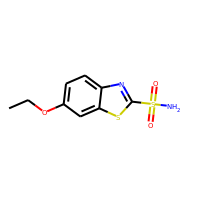
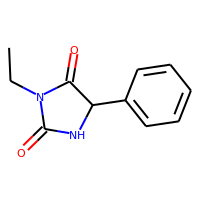
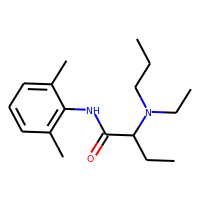
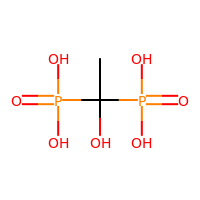
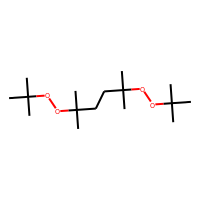

In [75]:
df.head()

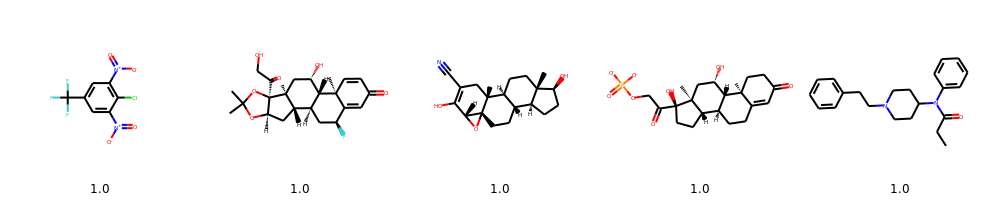

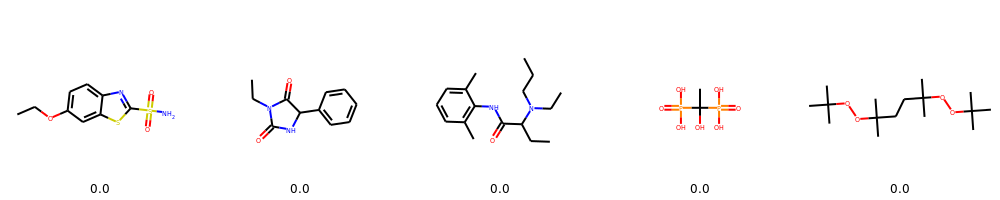

In [11]:
display(PandasTools
        .FrameToGridImage(df[df['NR-AR']==1].head(5), legendsCol='NR-AR', molsPerRow=5))
display(PandasTools.FrameToGridImage(df[df['NR-AR']==0].head(5), legendsCol='NR-AR', molsPerRow=5))

In [12]:
df.shape

(7265, 3)

In [13]:
df['NR-AR'].sum()

309.0

In [14]:
from mordred import Calculator, descriptors

In [15]:
calc = Calculator(descriptors, ignore_3D=True)

In [16]:
mol =df['ROMol'][:4]

In [19]:
df2 = calc.pandas(df['ROMol'])

  1%|          | 49/7265 [00:07<27:01,  4.45it/s]RDKit WARNING: [12:44:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:44:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:44:11] WARNING: not removing hydrogen atom without neighbors
  4%|▍         | 316/7265 [00:54<1:22:34,  1.40it/s]

/home/piskorz/Programs/miniconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:1897: RuntimeWarning: overflow encountered in reduce
  return um.multiply.reduce(a, axis=axis, dtype=dtype, out=out, **kwargs)
/home/piskorz/Programs/miniconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:1897: RuntimeWarning: overflow encountered in reduce
  return um.multiply.reduce(a, axis=axis, dtype=dtype, out=out, **kwargs)

  6%|▌         | 428/7265 [01:14<44:51,  2.54it/s]


/home/piskorz/Programs/miniconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:1897: RuntimeWarning: overflow encountered in reduce
  return um.multiply.reduce(a, axis=axis, dtype=dtype, out=out, **kwargs)
/home/piskorz/Programs/miniconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:1897: RuntimeWarning: overflow encountered in reduce
  return um.multiply.reduce(a, axis=axis, dtype=dtype, out=out, **kwargs)

100%|██████████| 7265/7265 [21:08<00:00,  4.56it/s]

In [21]:
df2.head()

ABC      ABCGG  nAcid  nBase  SpAbs_A  SpMax_A SpDiam_A   SpAD_A   SpMAD_A  LogEE_A    VE1_A     VE2_A    VE3_A    VR1_A    VR2_A    VR3_A  nAromAtom  nAromBond  nAtom  nHeavyAtom  nSpiro  nBridgehead  nHetero  nH  nB  nC  nN  nO  nS  nP  nF  nCl  nBr  nI  nX      ATS0dv      ATS1dv      ATS2dv      ATS3dv  ATS4dv  ATS5dv      ATS6dv      ATS7dv     ATS8dv  ATS0d  ATS1d  ATS2d  ATS3d  ATS4d  ATS5d  ATS6d  ATS7d  ATS8d    ATS0s    ATS1s    ATS2s    ATS3s    ATS4s    ATS5s    ATS6s    ATS7s    ATS8s   ATS0Z   ATS1Z   ATS2Z   ATS3Z   ATS4Z   ATS5Z   ATS6Z   ATS7Z   ATS8Z        ATS0m        ATS1m        ATS2m        ATS3m        ATS4m        ATS5m        ATS6m        ATS7m        ATS8m        ATS0v         ATS1v         ATS2v         ATS3v         ATS4v         ATS5v         ATS6v         ATS7v         ATS8v   ATS0se   ATS1se   ATS2se   ATS3se   ATS4se   ATS5se   ATS6se   ATS7se   ATS8se   ATS0pe   ATS1pe   ATS2pe   ATS3pe   ATS4pe   ATS5pe   ATS6pe   ATS7pe   ATS8pe  ATS0are  ATS1are  ATS2are  ATS3are  ATS4are  ATS5are  ATS6are  ATS7are  ATS8are      ATS0p      ATS1p       ATS2p       ATS3p       ATS4p       ATS5p       ATS6p       ATS7p       ATS8p        ATS0i        ATS1i         ATS2i         ATS3i         ATS4i         ATS5i         ATS6i         ATS7i         ATS8i    AATS0dv  AATS1dv  AATS2dv  AATS3dv   AATS4dv  AATS5dv   AATS6dv                                                           AATS7dv                                                           AATS8dv    AATS0d   AATS1d   AATS2d   AATS3d   AATS4d   AATS5d   AATS6d                                                AATS7d                                                AATS8d   AATS0s   AATS1s   AATS2s   AATS3s   AATS4s   AATS5s   AATS6s                                                AATS7s                                                AATS8s     AATS0Z   AATS1Z   AATS2Z   AATS3Z   AATS4Z   AATS5Z   AATS6Z                                                AATS7Z                                                AATS8Z      AATS0m   AATS1m   AATS2m   AATS3m   AATS4m   AATS5m   AATS6m                                                AATS7m                                                AATS8m      AATS0v   AATS1v   AATS2v   AATS3v   AATS4v   AATS5v   AATS6v                                                AATS7v                                                AATS8v  AATS0se  AATS1se  AATS2se  AATS3se  AATS4se  AATS5se  AATS6se                                                AATS7se                                                AATS8se  AATS0pe  AATS1pe  AATS2pe  AATS3pe  AATS4pe  AATS5pe  AATS6pe                                                AATS7pe                                                AATS8pe AATS0are AATS1are AATS2are AATS3are AATS4are AATS5are AATS6are                                                AATS7are                                                AATS8are    AATS0p   AATS1p   AATS2p   AATS3p    AATS4p    AATS5p    AATS6p                                                AATS7p                                                AATS8p      AATS0i   AATS1i   AATS2i   AATS3i   AATS4i   AATS5i   AATS6i                                                AATS7i                                                AATS8i    ATSC0c     ATSC1c     ATSC2c     ATSC3c     ATSC4c       ATSC5c      ATSC6c     ATSC7c     ATSC8c     ATSC0dv     ATSC1dv    ATSC2dv     ATSC3dv    ATSC4dv    ATSC5dv    ATSC6dv     ATSC7dv    ATSC8dv     ATSC0d     ATSC1d     ATSC2d     ATSC3d     ATSC4d     ATSC5d     ATSC6d     ATSC7d     ATSC8d   ATSC0s    ATSC1s   ATSC2s   ATSC3s   ATSC4s   ATSC5s   ATSC6s   ATSC7s   ATSC8s      ATSC0Z     ATSC1Z      ATSC2Z      ATSC3Z      ATSC4Z      ATSC5Z      ATSC6Z      ATSC7Z      ATSC8Z       ATSC0m      ATSC1m       ATSC2m       ATSC3m       ATSC4m      ATSC5m       ATSC6m       ATSC7m      ATSC8m       ATSC0v      ATSC1v      ATSC2v       ATSC3v       ATSC4v       ATSC5v       ATSC6v       ATSC7v       ATSC8v  ATSC0se    ATSC1se   ATSC2se   ATSC3se   ATSC4se   ATSC

In [45]:
from mordred.error import Missing
missing = []
for column in df2.columns:
    if (df2[column].apply(lambda x: type(x) ==Missing)).any():
        missing.append(column)

In [47]:
df_new = df2.drop(missing, axis=1)

In [49]:
df_new.head()

,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,nHetero,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0dv,ATS1dv,ATS2dv,ATS3dv,ATS4dv,ATS5dv,ATS6dv,ATS7dv,ATS8dv,ATS0d,ATS1d,ATS2d,ATS3d,ATS4d,ATS5d,ATS6d,ATS7d,ATS8d,ATS0Z,ATS1Z,ATS2Z,ATS3Z,ATS4Z,ATS5Z,ATS6Z,ATS7Z,ATS8Z,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,ATS8v,ATS0p,ATS1p,ATS2p,ATS3p,ATS4p,ATS5p,ATS6p,ATS7p,ATS8p,ATS0i,ATS1i,ATS2i,ATS3i,ATS4i,ATS5i,ATS6i,ATS7i,ATS8i,AATS0dv,AATS0d,AATS0Z,AATS0m,AATS0v,AATS0p,AATS0i,ATSC0dv,ATSC1dv,ATSC2dv,ATSC3dv,ATSC4dv,ATSC5dv,ATSC6dv,ATSC7dv,ATSC8dv,ATSC0d,ATSC1d,ATSC2d,ATSC3d,ATSC4d,ATSC5d,ATSC6d,ATSC7d,ATSC8d,ATSC0Z,ATSC1Z,ATSC2Z,ATSC3Z,ATSC4Z,ATSC5Z,ATSC6Z,ATSC7Z,ATSC8Z,ATSC0m,ATSC1m,ATSC2m,ATSC3m,ATSC4m,ATSC5m,ATSC6m,ATSC7m,ATSC8m,ATSC0v,ATSC1v,ATSC2v,ATSC3v,ATSC4v,ATSC5v,ATSC6v,ATSC7v,ATSC8v,ATSC0p,ATSC1p,ATSC2p,ATSC3p,ATSC4p,ATSC5p,ATSC6p,ATSC7p,ATSC8p,ATSC0i,ATSC1i,ATSC2i,ATSC3i,ATSC4i,ATSC5i,ATSC6i,ATSC7i,ATSC8i,AATSC0dv,AATSC0d,AATSC0Z,AATSC0m,AATSC0v,AATSC0p,AATSC0i,BalabanJ,BertzCT,nBonds,nBondsO,nBondsS,nBondsD,nBondsT,nBondsA,nBondsM,nBondsKS,nBondsKD,C1SP1,C2SP1,C1SP2,C2SP2,C3SP2,C1SP3,C2SP3,C3SP3,C4SP3,FCSP3,Xch-3d,Xch-4d,Xch-5d,Xch-6d,Xch-7d,Xch-3dv,Xch-4dv,Xch-5dv,Xch-6dv,Xch-7dv,Xc-3d,Xc-4d,Xc-5d,Xc-6d,Xc-4dv,Xc-6dv,Xpc-4d,Xpc-5d,Xpc-6d,Xp-1d,Xp-2d,Xp-3d,Xp-4d,Xp-5d,Xp-6d,Xp-7d,SZ,Sm,Sv,Sp,Si,MZ,Mm,Mv,Mp,Mi,NsLi,NssBe,NssssBe,NssBH,NsssB,NssssB,NsCH3,NdCH2,NssCH2,NtCH,NdsCH,NaaCH,NsssCH,NddC,NtsC,NdssC,NaasC,NaaaC,NssssC,NsNH3,NsNH2,NssNH2,NdNH,NssNH,NaaNH,NtN,NsssNH,NdsN,NaaN,NsssN,NddsN,NaasN,NssssN,NsOH,NdO,NssO,NaaO,NsF,NsSiH3,NssSiH2,NsssSiH,NssssSi,NsPH2,NssPH,NsssP,NdsssP,NsssssP,NsSH,NdS,NssS,NaaS,NdssS,NddssS,NsCl,NsGeH3,NssGeH2,NsssGeH,NssssGe,NsAsH2,NssAsH,NsssAs,NsssdAs,NsssssAs,NsSeH,NdSe,NssSe,NaaSe,NdssSe,NddssSe,NsBr,NsSnH3,NssSnH2,NsssSnH,NssssSn,NsI,NsPbH3,NssPbH2,NsssPbH,NssssPb,SsLi,SssBe,SssssBe,SssBH,SsssB,SssssB,SsCH3,SdCH2,SssCH2,StCH,SdsCH,SaaCH,SsssCH,SddC,StsC,SdssC,SaasC,SaaaC,SssssC,SsNH3,SsNH2,SssNH2,SdNH,SssNH,SaaNH,StN,SsssNH,SdsN,SaaN,SsssN,SddsN,SaasN,SssssN,SsOH,SdO,SssO,SaaO,SsF,SsSiH3,SssSiH2,SsssSiH,SssssSi,SsPH2,SssPH,SsssP,SdsssP,SsssssP,SsSH,SdS,SssS,SaaS,SdssS,SddssS,SsCl,SsGeH3,SssGeH2,SsssGeH,SssssGe,SsAsH2,SssAsH,SsssAs,SsssdAs,SsssssAs,SsSeH,SdSe,SssSe,SaaSe,SdssSe,SddssSe,SsBr,SsSnH3,SssSnH2,SsssSnH,SssssSn,SsI,SsPbH3,SssPbH2,SsssPbH,SssssPb,ECIndex,fragCpx,fMF,nHBAcc,nHBDon,IC0,IC1,IC2,IC3,IC4,IC5,TIC0,TIC1,TIC2,TIC3,TIC4,TIC5,CIC0,CIC1,CIC2,CIC3,CIC4,CIC5,MIC0,MIC1,MIC2,MIC3,MIC4,MIC5,ZMIC0,ZMIC1,ZMIC2,ZMIC3,ZMIC4,ZMIC5,Lipinski,GhoseFilter,FilterItLogS,VMcGowan,LabuteASA,PEOE_VSA1,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,SMR_VSA1,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,SlogP_VSA10,SlogP_VSA11,EState_VSA1,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,EState_VSA10,VSA_EState1,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,MPC2,MPC3,MPC4,MPC5,MPC6,MPC7,MPC8,MPC9,MPC10,TMPC10,piPC1,piPC2,piPC3,piPC4,piPC5,piPC6,piPC7,piPC8,piPC9,piPC10,TpiPC10,apol,bpol,nRing,n3Ring,n4Ring,n5Ring,n6Ring,n7Ring,n8Ring,n9Ring,n10Ring,n11Ring,n12Ring,nG12Ring,nHRing,n3HRing,n4HRing,n5HRing,n6HRing,n7HRing,n8HRing,n9HRing,n10HRing,n11HRing,n12HRing,nG12HRing,naRing,n3aRing,n4aRing,n5aRing,n6aRing,n7aRing,n8aRing,n9aRing,n10aRing,n11aRing,n12aRing,nG12aRing,naHRing,n3aHRing,n4aHRing,n5aHRing,n6aHRing,n7aHRing,n8aHRing,n9aHRing,n10aHRing,n11aHRing,n12aHRing,nG12aHRing,nARing,n3ARing,n4ARing,n5ARing,n6ARing,n7ARing,n8ARing,n9ARing,n10ARing,n11ARing,n12ARing,nG12ARing,nAHRing,n3AHRing,n4AHRing,n5AHRing,n6AHRing,n7AHRing,n8AHRing,n9AHRing,n10AHRing,n11AHRing,n12AHRing,nG12AHRing,nFRing,n4FRing,n5FRing,n6FR

In [51]:
y = df['NR-AR']
X = df_new

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
clf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)

In [69]:
(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]), clf.score(X_train,y_train),clf.score(X_test,y_test))

(0.7846574069978325, 0.9994493392070485, 0.9763346175013758)

In [65]:
from sklearn.neural_network import MLPClassifier

In [70]:
clf = MLPClassifier(hidden_layer_sizes=[1000,500,250,100,50,20]).fit(X_train, y_train)

In [71]:
(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]), clf.score(X_train,y_train),clf.score(X_test,y_test))

(0.7762750475516433, 0.9669603524229075, 0.9631260319207485)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
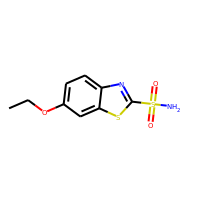
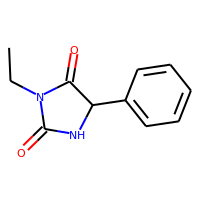
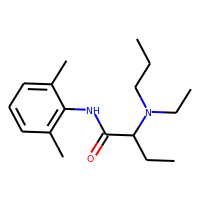
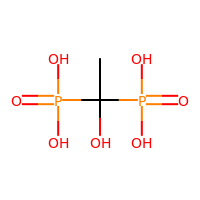
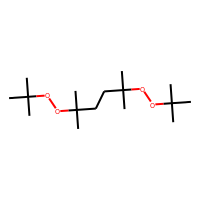

In [76]:
df['ROMol'].head()

In [82]:
from rdkit.Chem import AllChem, DataStructs

In [94]:
#def fingerprintSeries(series):

series = df['ROMol']
new = [[None]*series.shape[0]]

for mol in range(series.shape[0]):
    fp = AllChem.GetMorganFingerprintAsBitVect(series.iloc[mol],2)
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    new[mol]=arr

#return pd.Series(new)

#fingerprintSeries(df['ROMol'])

IndexError: list assignment index out of range

In [93]:
new

[[None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,


In [77]:
df['ROMol'].shape

(7265,)